<a href="https://colab.research.google.com/github/TravisJRCain/Build-Week-2/blob/master/Build_Week_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
# Only going to use regression for this data set
# R^2 and baseline at the beginning
# Predicting MVP/WAR based off certain features/metrics
# 2012-2019 MVPS
# 2012: Buster Posey, Miguel Cabrera
# 2013: Andrew McCutchen, Miguel Cabrera
# 2014: Clayton Kershaw, Mike Trout
# 2015: Bryce Harper, Josh Donaldson
# 2016: Kris Bryant, Mike Trout
# 2017: Giancarlo Stanton, Jose Altuve
# 2018: Chrstian Yelich, Mookie Betts
# 2019: Cody Bellinger, Mike Trout

In [0]:
%%capture
import sys

!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [0]:
# Import various libraries

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [5]:
### PyBaseball ###
pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=f6827e04a37da24184b7a2fd515a8158054c30e528d83aaf97f6f536583e9fdf
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


In [0]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from pybaseball import batting_stats
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = batting_stats(2012, 2019, league='all')
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [8]:
df.shape

(7726, 287)

In [9]:
# List columns

list(df.columns)

['Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Fld',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'phLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'FA% (pfx)',
 'FT% (pf

In [0]:
# Drop high cardinality columns

# df = df.drop(columns=['Name', 'Dol', 'Team'])

In [11]:
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [12]:
### Remove outliers ###
# 'LD', 'wRC+', 'OPS', 'wOBA', 'ISO'
df['LD'].describe()

count    7726.000000
mean       27.513332
std        34.207201
min         0.000000
25%         1.000000
50%         9.000000
75%        49.000000
max       159.000000
Name: LD, dtype: float64

In [13]:
df['wRC+'].describe()

count    7726.000000
mean       41.816205
std        93.801612
min      -100.000000
25%       -30.000000
50%        67.000000
75%       102.000000
max       747.000000
Name: wRC+, dtype: float64

In [14]:
# Remove outliers by number of plate appearances
# Remove outliers by only taking data from 300 or more PA
df['PA'].describe()

count    7726.000000
mean      191.319311
std       219.608282
min         1.000000
25%         9.000000
50%        73.000000
75%       345.000000
max       747.000000
Name: PA, dtype: float64

In [15]:
df = df[df['PA'] >= 300]
df.shape

(2178, 287)

In [16]:
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [17]:
WAR_info = df.loc[df['WAR'] >= 6.0]
WAR_info

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2015.0,Lorenzo Cain,Royals,29.0,140.0,551.0,604.0,169.0,113.0,34.0,6.0,16.0,101.0,72.0,37.0,4.0,98.0,12.0,4.0,0.0,16.0,28.0,6.0,0.307,208.0,143.0,106.0,4.0,2299.0,826.0,1473.0,21.0,0.0,0.0,0.061,0.162,0.38,0.361,0.477,0.838,...,NaN,-4.9,9.5,5.3,2.6,1.7,NaN,6.1,1.4,NaN,-7.0,NaN,5.9,11.8,2.4,-1.0,-0.1,NaN,5.4,1.9,NaN,-2.58,NaN,3.13,1.57,1.31,-4.02,-0.60,NaN,1.24,0.48,NaN,0.335,0.688,0.495,0.698,0.906,0.829,0.454,24.1
298,2013.0,Paul Goldschmidt,Diamondbacks,25.0,160.0,602.0,710.0,182.0,107.0,36.0,3.0,36.0,103.0,125.0,99.0,19.0,145.0,3.0,5.0,0.0,25.0,15.0,7.0,0.302,205.0,160.0,97.0,6.0,2930.0,1193.0,1737.0,14.0,0.0,0.0,0.139,0.204,0.68,0.401,0.551,0.952,...,-7.1,-5.6,9.3,5.4,2.4,NaN,NaN,5.8,1.0,NaN,3.8,0.9,3.5,22.4,-1.2,-1.2,NaN,NaN,10.2,0.8,NaN,2.03,14.18,1.34,2.11,-0.50,-2.96,NaN,NaN,1.96,0.16,NaN,0.224,0.618,0.416,0.666,0.842,0.794,0.488,23.1
460,2015.0,Andrew McCutchen,Pirates,28.0,157.0,566.0,685.0,165.0,103.0,36.0,3.0,23.0,91.0,96.0,98.0,12.0,133.0,12.0,9.0,0.

In [18]:
### Make 'MVP' Column ###

df['MVP'] = df['WAR'] >= 6.0
df['MVP']

140      True
233      True
280      True
287      True
145      True
        ...  
3410    False
3404    False
3931    False
3836    False
4552    False
Name: MVP, Length: 2178, dtype: bool

In [0]:
# Replace True/False with 1 or 0

df['MVP'] = df['MVP'].replace('True', 1)
df['MVP'] = df['MVP'].replace('False', 0)

In [20]:
df['MVP'].head()

140    True
233    True
280    True
287    True
145    True
Name: MVP, dtype: bool

In [21]:
# Baseline
df['WAR'].mean()

2.056657483930207

In [0]:
# Train/Test/Val split

train = df[df['Season'] <= 2015.0]
val = df[df['Season'] == 2016.0]
test = df[df['Season'] >= 2017.0]

In [23]:
train.shape, val.shape, test.shape

((1072, 288), (268, 288), (838, 288))

In [0]:
features = ['LD%', 'wRC+', 'OPS', 'wOBA', 'ISO', 'H', 'HR', 'RBI', 'BABIP', 'BB']
target = 'WAR'

In [25]:
train[target].value_counts(normalize=True)

1.5    0.029851
1.9    0.026119
1.8    0.025187
1.6    0.024254
0.6    0.023321
         ...   
6.3    0.000933
6.7    0.000933
8.7    0.000933
7.8    0.000933
7.0    0.000933
Name: WAR, Length: 107, dtype: float64

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [27]:
# Fit Linear Regression Model
# Baseline
lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.6902223385740253


In [0]:
from sklearn.linear_model import LinearRegression
# Instantiate model class
model = LinearRegression()

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [35]:
# Random Forest Regression Model
# Baseline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6761690608240631


In [36]:
# Instantiate one-hot encoder
encoder = ce.OneHotEncoder()

# Fit and transform on train/test sets
X_train1 = encoder.fit_transform(X_train)
X_test1 = encoder.transform(X_test)

X_train1

,LD%,wRC+,OPS,wOBA,ISO,H,HR,RBI,BABIP,BB
233,0.230,176.0,0.988,0.423,0.234,190.0,27.0,97.0,0.376,110.0
280,0.226,167.0,0.963,0.409,0.238,182.0,30.0,83.0,0.383,67.0
287,0.246,164.0,0.957,0.406,0.213,178.0,24.0,103.0,0.368,69.0
131,0.222,197.0,1.109,0.461,0.319,172.0,42.0,99.0,0.369,124.0
258,0.244,171.0,0.991,0.415,0.290,172.0,41.0,90.0,0.344,92.0
...,...,...,...,...,...,...,...,...,...,...
4179,0.223,60.0,0.575,0.259,0.074,60.0,2.0,22.0,0.242,28.0
2677,0.221,93.0,0.681,0.304,0.142,82.0,11.0,44.0,0.317,55.0
3404,0.210,77.0,0.667,0.286,0.120,108.0,11.0,64.0,0.253,31.0
3931,0.170,73.0,0.577,0.270,0.064,54.0,3.0,25.0,0.225,53.0


In [0]:
# Instantiate model class
model = LinearRegression()
# Fit the model
model.fit(X_train1, y_train)
# Apply the model to new data
y_pred1 = model.predict(X_train1)
y_pred2 = model.predict(X_test1)

In [39]:
# xgboost

from xgboost import XGBRegressor

# Instantiate and fit one-hot encoder
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded  = encoder.fit_transform(X_test)

# Instantiate XGBRegressor and parameter tuning
model = XGBRegressor(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)
# Instantiate eval_set
eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

# Fit model to the eval_set
model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='mae', 
          early_stopping_rounds=50)

[22:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:1.15806	validation_1-mae:1.26686
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:0.797583	validation_1-mae:1.00122
[2]	validation_0-mae:0.615758	validation_1-mae:0.923551
[3]	validation_0-mae:0.513547	validation_1-mae:0.904884
[4]	validation_0-mae:0.460398	validation_1-mae:0.905369
[5]	validation_0-mae:0.405107	validation_1-mae:0.90502
[6]	validation_0-mae:0.387159	validation_1-mae:0.904907
[7]	validation_0-mae:0.355537	validation_1-mae:0.913089
[8]	validation_0-mae:0.320598	validation_1-mae:0.921436
[9]	validation_0-mae:0.312954	validation_1-mae:0.921137
[10]	validation_0-mae:0.302897	validation_1-mae:0.920454
[11]	validation_0-mae:0.278574	validation_1-mae:0.923143
[12]	validation_0-mae:0.259083	validation_1-ma

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [40]:
# Calculate r2 for the train and test data
y_pred1 = model.predict(X_train_encoded)
y_pred2 = model.predict(X_test_encoded)
r2 = r2_score(train[target], y_pred1)
print(f'The R2 of the training data is {r2}')
r2 = r2_score(test[target], y_pred2)
print(f'The R2 of the test data is {r2}')

The R2 of the training data is 0.880234147793667
The R2 of the test data is 0.6135767313592276


In [41]:
import eli5
from eli5.sklearn import PermutationImportance
# Instantiate permuter for XGBRegressor
permuter = PermutationImportance(
    model,
    scoring='r2',
    n_iter=5,
    random_state=42
)
# Fit permuter to data from our model
permuter.fit(X_train_encoded, y_train)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.5,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=1, missing=None,
                                             n_estimators=1000, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                     

In [42]:
# Pull out top features and their importance
feature_names = X_train_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

HR       0.021973
LD%      0.051642
ISO      0.055057
OPS      0.060758
BABIP    0.075083
BB       0.075283
RBI      0.077177
wOBA     0.098030
H        0.439346
wRC+     0.831149
dtype: float64

In [43]:
# Visualize feature importances 
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.8311 ± 0.0756,wRC+
0.4393 ± 0.0210,H
0.0980 ± 0.0093,wOBA
0.0772 ± 0.0107,RBI
0.0753 ± 0.0062,BB
0.0751 ± 0.0044,BABIP
0.0608 ± 0.0041,OPS
0.0551 ± 0.0048,ISO
0.0516 ± 0.0075,LD%
0.0220 ± 0.0046,HR


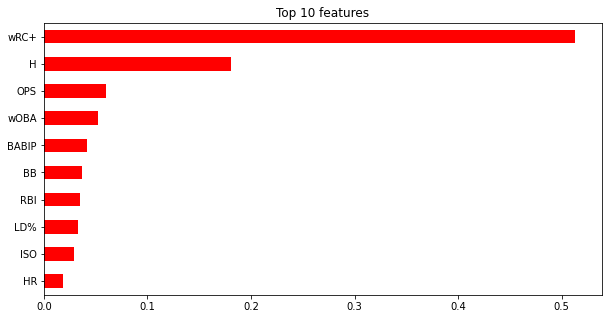

In [44]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='red');

In [0]:
### Visualizations! ###

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


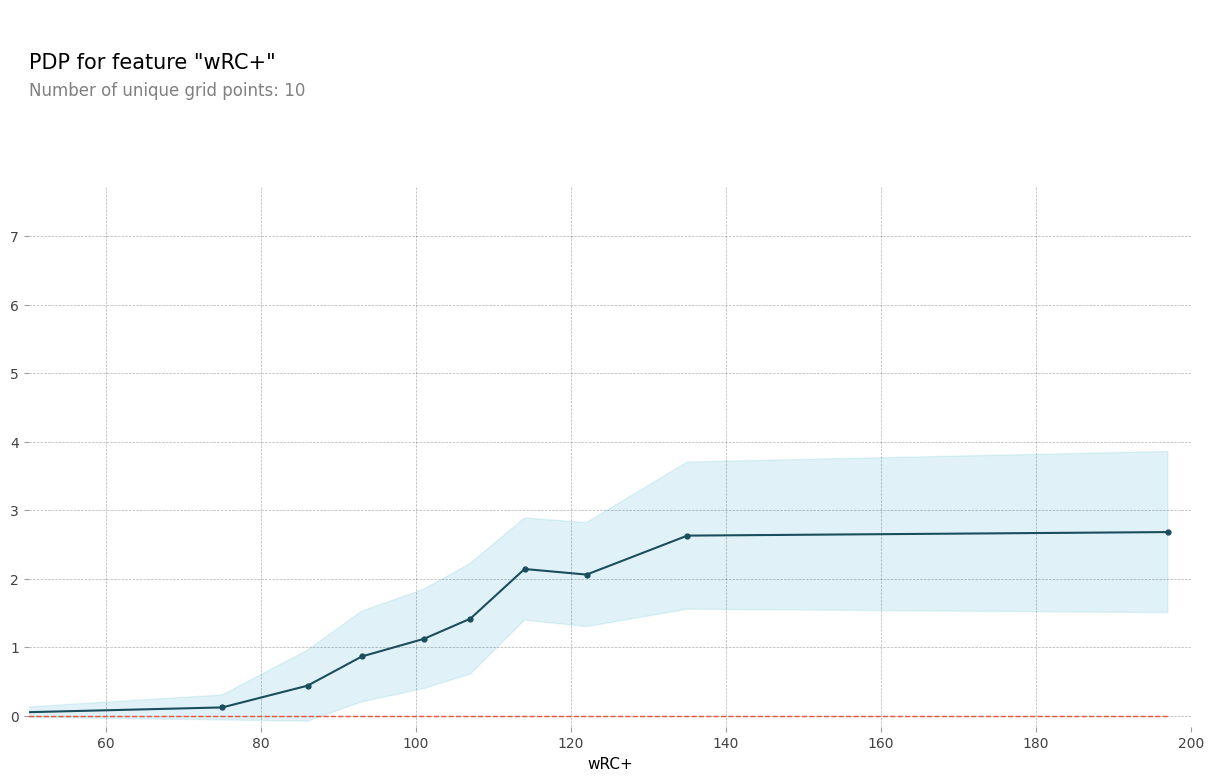

In [47]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# Designate feature to analyze
feature = 'wRC+'

# Instantiate isolated conditional plot
isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train_encoded.columns,
    feature=feature
)
# Visualize pdp plot
pdp_plot(isolated, feature_name=feature)
plt.xlim((50, 200));

(<Figure size 1500x950 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f702db94668>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f702dbdf4e0>})

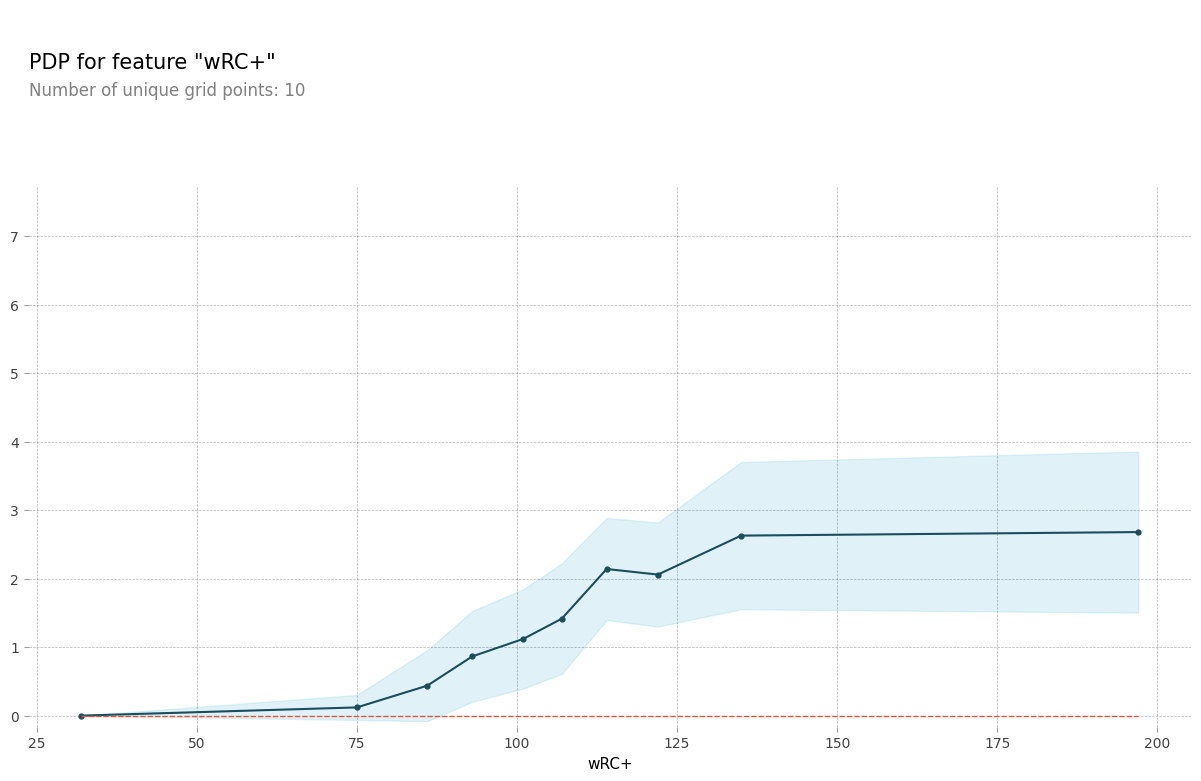

In [48]:
pdp_plot(isolated, feature_name=feature)

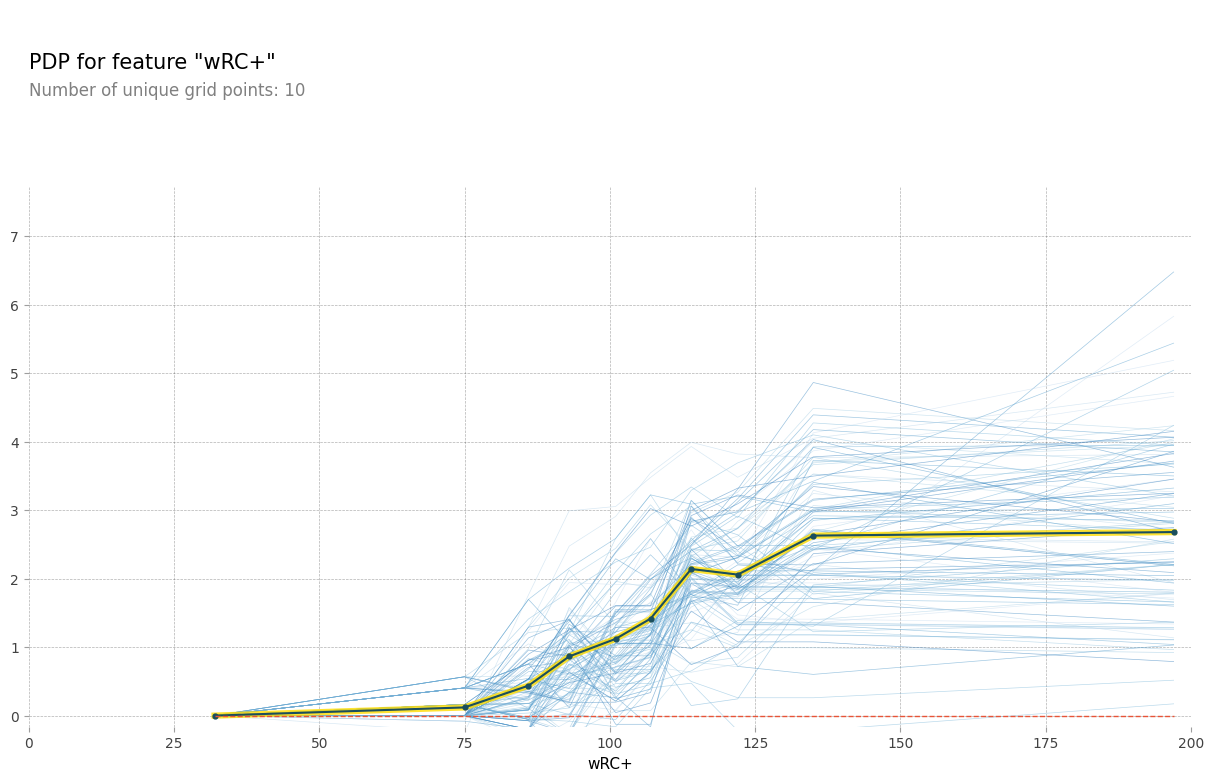

In [49]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.1)

plt.xlim(0,200);

In [0]:
# Partial Dependence Plots w/ 2 features

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['H', 'wRC+']

interaction = pdp_interact(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


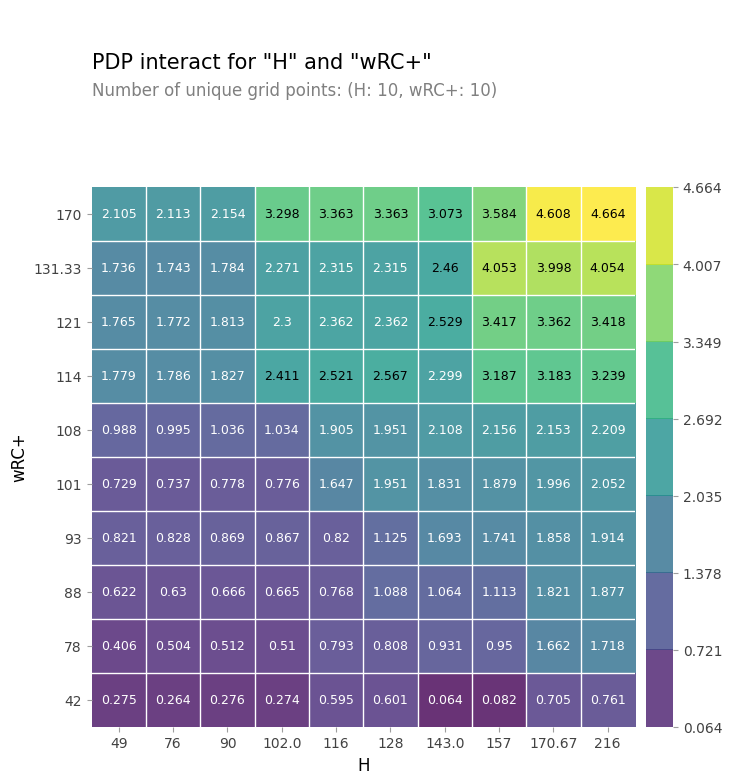

In [51]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [52]:
import shap
# Instantiate individual prediction
row = X_train_encoded.iloc[[0]]

# Instantiate TreeExplainer
explainer = shap.TreeExplainer(model)

# Pull shap values for individual observation
shap_values = explainer.shap_values(row)

# Visualize feature importance on individual prediction
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [53]:
# Predicting across X_train_encoded 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_encoded)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_train
)